# Project


In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import seaborn as sns
import numpy as np
import random
sns.set_style('darkgrid')

%matplotlib inline

In [3]:
#Read in the data
df = pd.read_csv("survey.csv")

In [4]:
df.columns=['self_employed','no_employees','tech_organization', 'role_tech_related', 'health_benefits','known_options',
            'mental_health_discussed','resources_offered','anonymity_protected', 'difficulty_of_leave','negative_consequences_mental',
            'negative_consequences_physical','mental_coworkers','mental_supervisor','mental_same_physical','consequences_open_disc', 
            'medical_incl_mental','aware_resources','reveal_clients','reveal_client_impact','reveal_coworkers','reveal_cowork_impact',
            'product_affect','percentage_time','prev_employer','prev_emp_mhealth_ben','prev_emp_aware_options','prev_emp_mental_discuss',
            'prev_emp_resources','prev_emp_anonymity','prev_emp_negative_conseq_mental','prev_emp_negative_conseq_physical','pre_mental_coworkers',
            'pre_mental_supervisor','prev_emp_mental_physical','prev_emp_consequences_coworkers','physical_interview','why','mental_interview','why2',
            'hurt_career','negative_view','willing_to_share_mental','observe_bad_response','observation_affect_your_decision','fam_his',
            'past_mentdis','current_mentdis','what_condition','maybe_what','diagnosed','what_diagnosis','treatment','interfere_while_treated',
            'interfere_not_treated','age','gender','country_live','state_live','country_work','state_work','type_position','remote']

In [5]:
# Feature selection
drop_elements = ['prev_employer','prev_emp_mhealth_ben','prev_emp_aware_options','prev_emp_mental_discuss','role_tech_related',
                 'prev_emp_resources','prev_emp_anonymity','prev_emp_negative_conseq_mental','prev_emp_negative_conseq_physical',
                 'pre_mental_coworkers','pre_mental_supervisor','prev_emp_mental_physical','prev_emp_consequences_coworkers']#work interfere goes because by defnition, if it inteferes with your work, then you definitely have a mental health issue
df = df.drop(drop_elements, axis = 1)


In [6]:
df.head(10)

,self_employed,no_employees,tech_organization,health_benefits,known_options,mental_health_discussed,resources_offered,anonymity_protected,difficulty_of_leave,negative_consequences_mental,...,interfere_while_treated,interfere_not_treated,age,gender,country_live,state_live,country_work,state_work,type_position,remote
0,0,26-100,1.0,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,No,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,No,Yes,Yes,Yes,Yes,Somewhat easy,No,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,No,NaN,No,No,I don't know,Neither easy nor difficult,Maybe,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
5,0,More than 1000,1.0,Yes,I am not sure,No,Yes,Yes,Somewhat easy,Yes,...,Not applicable to me,Often,42,Male,United Kingdom,NaN,United Kingdom,NaN,DevOps/SysAdmin|Support|Back-end Developer|Fro...,Sometimes
6,0,26-100,1.0,I don't know,No,No,No,I don't know,Somewhat easy,No,...,Not applicable to me,Not applicable to me,30,M,United States of America,Tennessee,United States of America,Tennessee,Back-end Developer,Sometimes
7,0,More than 1000,1.0,Yes,Yes,No,Yes,Yes,Very easy,No,...,Sometimes,Often,37,female,United States of America,Virginia,United States of America,Virginia,Dev Evangelist/Advocate|Back-end Developer,Always
8,0,26-100,0.0,I don't know,No,No,No,I don't know,Very difficult,Yes,...,Rarely,Often,44,Female,United States of America,California,United States of America,California,Support|Back-end Developer|One-person shop,Sometimes
9,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Rarely,Often,30,Male,United States of America,Kentucky,United States of America,Kentucky,One-person shop|Front-end Developer|Back-end D...,Always


In [7]:
#dealing with nulls
df['health_benefits'].fillna('I don\'t know',inplace=True)
df['known_options'].fillna('I am not sure',inplace=True)
df['mental_health_discussed'].fillna('I don\'t know',inplace=True)
df['resources_offered'].fillna('I don\'t know',inplace=True)
df['anonymity_protected'].fillna('I don\'t know',inplace=True)
df['negative_consequences_mental'].fillna('Maybe',inplace=True)
df['negative_consequences_physical'].fillna('Maybe',inplace=True)
df['mental_coworkers'].fillna('Maybe',inplace=True)
df['mental_supervisor'].fillna('Maybe',inplace=True)
df['mental_same_physical'].fillna('I don\'t know',inplace=True)
df['consequences_open_disc'].fillna('I don\'t know',inplace=True)
df['reveal_client_impact'].fillna('I\'m not sure',inplace=True)
df['reveal_cowork_impact'].fillna('I\'m not sure',inplace=True)
df['fam_his'].fillna('I don\'t know',inplace=True)
df['interfere_while_treated'].fillna('Not applicable to me',inplace=True)
df['interfere_not_treated'].fillna('Not applicable to me',inplace=True)
df['product_affect'].fillna('Unsure',inplace=True)
df['observe_bad_response'].fillna('N/A',inplace=True)
df['observation_affect_your_decision'].fillna('N/A',inplace=True)
df['tech_organization'].fillna(1,inplace=True)
df['no_employees'].fillna('1-5',inplace=True)
df['difficulty_of_leave'].fillna('',inplace=True)
df['what_condition'].fillna('',inplace=True)
df['maybe_what'].fillna('',inplace=True)

#another way to deal with nulls
# Now change comments column to flag whether or not respondent made additional comments
df.loc[df['why'].isnull(),['why']]=0 # replace all no comments with zero
df.loc[df['why']!=0,['why']]=1 # replace all comments with a flag 1
df.loc[df['why2'].isnull(),['why2']]=0 # replace all no comments with zero
df.loc[df['why2']!=0,['why2']]=1 # replace all comments with a flag 1
df.loc[df['health_benefits'].isnull(),['health_benefits']]=0 # replace all no comments with zero

In [8]:
#preserve order in awareness of reveal to coworkers
df.loc[df['reveal_coworkers']=='Yes, always',['reveal_coworkers']]=2
df.loc[df['reveal_coworkers']=='Sometimes, if it comes up',['reveal_coworkers']]=1
df.loc[df['reveal_coworkers']=='Not applicable to me',['reveal_coworkers']]=0
df.loc[df['reveal_coworkers']=='No, because it doesn\'t matter',['reveal_coworkers']]=-1
df.loc[df['reveal_coworkers']=='No, because it would impact me negatively',['reveal_coworkers']]=-2

#preserve order if you observed a bad response
df.loc[df['observe_bad_response']=='Yes, I experienced',['observe_bad_response']]=2
df.loc[df['observe_bad_response']=='Yes, I observed',['observe_bad_response']]=1
df.loc[df['observe_bad_response']=='Maybe/Not sure',['observe_bad_response']]=0
df.loc[df['observe_bad_response']=='No, because it doesn\'t matter',['observe_bad_response']]=3
df.loc[df['observe_bad_response']=='No',['observe_bad_response']]=4

#preserve order in percent work time affected
df.loc[df['percentage_time']=='1-25%',['percentage_time']]=1
df.loc[df['percentage_time']=='26-50%',['percentage_time']]=2
df.loc[df['percentage_time']=='51-75%',['percentage_time']]=3
df.loc[df['percentage_time']=='76-100%',['percentage_time']]=4

#Combine No and N/A in health coverage to be "No"
df['health_benefits'].replace(["Not eligible for coverage / N/A"], "No",inplace=True)


In [9]:
#Combining gender responses
df['gender'].replace(to_replace = ["Male (trans, FtM)",'ish','cis male','cis man','cisdude','MALE ',
                                   'm','man','dude','Sex is male', 'male','M', 'Dude', 'I\'m a man why didn\'t you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ',
                                   'male 9:1 female, roughly', 'Male (cis)', 'nb masculine', 'Cis Male', 'Cis male',
                                   'Male.','Man','Malr','mail','M|','male ','m    ','Male ','MALE' ],value='Male',inplace=True)
df['gender'].replace(to_replace = ('Agender', 'AFAB','Androgynous','Bigender','enby','none of your business',
                                   'Fluid','Genderfluid','Genderfluid (born female)',' genderqueer','Female or Multi-Gender Femme',
                                   'Female bodied', 'queer', 'non-binary', 'Other', 'Male/genderqueer', 'Unicorn', 'Nonbinary',
                                   'Genderqueer','Human','Enby','Queer','genderqueer','human'),value= 'Other/Agender/Bi-gender',inplace=True)
df['gender'].replace(to_replace = ['Female','F','f','Fem' ,'Feanl' ,'cis female','Cis female ' , 'cis-woman','Woman','cis female',
                                   'fm','cisgender Female','female','Transitioned, M2F' ,'genderflux demi-girl',
                                   'I identify as female.', 'Other/Transfeminine','woman','female/woman','Cisgender Female',
                                   'genderqueer woman','mtf','fem', 'Cis-woman', 'Genderflux demi-girl','female-bodied; no feelings about gender', 
                                   ' Female','Female CIS gender','Female assigned at birth ','Cis female','Transgender woman',
                                   'Female (props for making this a freeform field, though)','female ','Female '], value='Female', inplace=True)

In [10]:
#Cleaning up the conditions
df['what_condition'].replace(['Autism Spectrum Disorder', 'Autism - while not a "mental illness", still greatly affects how I handle anxiety',
    'autism spectrum disorder', 'PDD-NOS'], 'Autism')
df['what_condition'].replace(['Aspergers', 'Asperger Syndrome'], "Asperger's Syndrome")
df['what_condition'].replace(['posttraumatic stress disourder'], 'Post-traumatic Stress Disorder')
df['what_condition'].replace(['ADD', 'Attention Deficit Disorder', 'attention deficit disorder'],
                       'Attention Deficit Hyperactivity Disorder')
df['what_condition'].replace(['Schizotypal Personality Disorder'], 'Personality Disorder')
df['what_condition'].replace(['Depression'], 'Mood Disorder')
df['what_condition'].replace(['Autism', "Asperger's Syndrome", 'Intimate Disorder', 'Seasonal Affective Disorder', 'Burn out', 'Gender Identity Disorder','Suicidal Ideation', 'Gender Dysphoria', 'MCD'], 'Others')

df['maybe_what'].replace(['Autism Spectrum Disorder', 'Autism - while not a "mental illness", still greatly affects how I handle anxiety',
    'autism spectrum disorder', 'PDD-NOS'], 'Autism')
df['maybe_what'].replace(['Aspergers', 'Asperger Syndrome'], "Asperger's Syndrome")
df['maybe_what'].replace(['posttraumatic stress disourder'], 'Post-traumatic Stress Disorder')
df['maybe_what'].replace(['ADD', 'Attention Deficit Disorder', 'attention deficit disorder'],
                       'Attention Deficit Hyperactivity Disorder')
df['maybe_what'].replace(['Schizotypal Personality Disorder'], 'Personality Disorder')
df['maybe_what'].replace(['Depression'], 'Mood Disorder')
df['maybe_what'].replace(['Autism', "Asperger's Syndrome", 'Intimate Disorder', 'Seasonal Affective Disorder', 'Burn out', 'Gender Identity Disorder','Suicidal Ideation', 'Gender Dysphoria', 'MCD'], 'Others')

df.loc[df['what_condition'].str.contains('Mood Disorder',case=False,na=False),'what_condition']='Mood Disorder'
df.loc[df['what_condition'].str.contains('Anxiety Disorder',case=False,na=False),'what_condition']='Anxiety Disorder'
df.loc[df['what_condition'].str.contains('Psychotic Disorder',case=False,na=False),'what_condition']='Psychotic Disorder'
df.loc[df['what_condition'].str.contains('Substance',case=False,na=False),'what_condition']='Anxiety Disorder'
df.loc[df['what_condition'].str.contains('Personality',case=False,na=False),'what_condition']='Personality Disorder'
df.loc[df['what_condition'].str.contains('Eating',case=False,na=False),'what_condition']='Eating Disorder'

df.loc[df['maybe_what'].str.contains('Mood Disorder',case=False,na=False),'maybe_what']='Mood Disorder'
df.loc[df['maybe_what'].str.contains('Anxiety Disorder',case=False,na=False),'maybe_what']='Anxiety Disorder'
df.loc[df['maybe_what'].str.contains('Psychotic Disorder',case=False,na=False),'maybe_what']='Psychotic Disorder'
df.loc[df['maybe_what'].str.contains('Substance',case=False,na=False),'maybe_what']='Substance Abuse Disorder'
df.loc[df['maybe_what'].str.contains('Personality',case=False,na=False),'maybe_what']='Personality Disorder'
df.loc[df['maybe_what'].str.contains('Eating',case=False,na=False),'maybe_what']='Eating Disorder'


In [11]:
#Change bogus numbers in age column
df['age'].replace(to_replace = [323], value=32,inplace=True)
df['age'].replace(to_replace = [300], value=30,inplace=True)
df['age'].replace(to_replace = [99], value=35,inplace=True)
df['age'].replace(to_replace = [3], value=30,inplace=True)

In [12]:
df.head(10)

,self_employed,no_employees,tech_organization,health_benefits,known_options,mental_health_discussed,resources_offered,anonymity_protected,difficulty_of_leave,negative_consequences_mental,...,interfere_while_treated,interfere_not_treated,age,gender,country_live,state_live,country_work,state_work,type_position,remote
0,0,26-100,1.0,No,I am not sure,No,No,I don't know,Very easy,No,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,No,Yes,Yes,Yes,Yes,Somewhat easy,No,...,Rarely,Sometimes,29,Male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,No,I am not sure,No,No,I don't know,Neither easy nor difficult,Maybe,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,1-5,1.0,I don't know,I am not sure,I don't know,I don't know,I don't know,,Maybe,...,Sometimes,Sometimes,43,Male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
5,0,More than 1000,1.0,Yes,I am not sure,No,Yes,Yes,Somewhat easy,Yes,...,Not applicable to me,Often,42,Male,United Kingdom,NaN,United Kingdom,NaN,DevOps/SysAdmin|Support|Back-end Developer|Fro...,Sometimes
6,0,26-100,1.0,I don't know,No,No,No,I don't know,Somewhat easy,No,...,Not applicable to me,Not applicable to me,30,Male,United States of America,Tennessee,United States of America,Tennessee,Back-end Developer,Sometimes
7,0,More than 1000,1.0,Yes,Yes,No,Yes,Yes,Very easy,No,...,Sometimes,Often,37,Female,United States of America,Virginia,United States of America,Virginia,Dev Evangelist/Advocate|Back-end Developer,Always
8,0,26-100,0.0,I don't know,No,No,No,I don't know,Very difficult,Yes,...,Rarely,Often,44,Female,United States of America,California,United States of America,California,Support|Back-end Developer|One-person shop,Sometimes
9,1,1-5,1.0,I don't know,I am not sure,I don't know,I don't know,I don't know,,Maybe,...,Rarely,Often,30,Male,United States of America,Kentucky,United States of America,Kentucky,One-person shop|Front-end Developer|Back-end D...,Always


# The number of employees by group


### Number of Employees in company

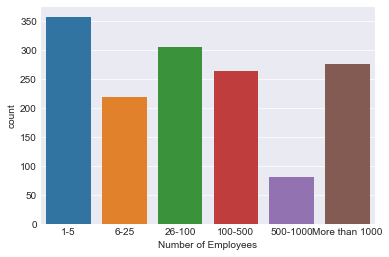

In [13]:
# this question only applies to non self-employed
g = sns.countplot(x='no_employees', data= df,orient="v",order=['1-5','6-25','26-100','100-500','500-1000','More than 1000'] )
g.set_xlabel('Number of Employees')

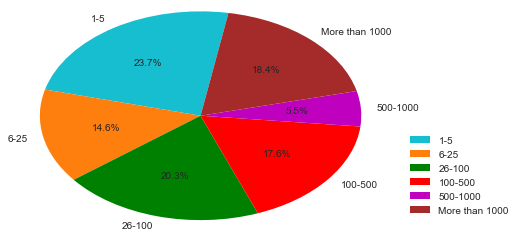

In [14]:
# defining labels
numbers = ['1-5','6-25','26-100','100-500','500-1000','More than 1000']

# portion covered by each label
slices = [sum(df.no_employees == '1-5'),sum(df.no_employees == '6-25'),sum(df.no_employees == '26-100'),sum(df.no_employees == '100-500'),sum(df.no_employees == '500-1000'),sum(df.no_employees == 'More than 1000') ]
                                            
# color for each label
colors = ["#17becf", "#ff7f0e", 'g', 'r', 'm', "brown"]

# plotting the pie chart
plt.pie(slices, labels = numbers, colors=colors, 
        startangle=80, shadow = False, explode = (0, 0, 0, 0,0,0),
        radius = 1.2, autopct = '%1.1f%%')

# plotting legend
plt.legend(loc = 'lower left',bbox_to_anchor = [1.1, 0])



# What percentage of employees have mental health coverage? How many have mental health disorder?
* There are a lot of people in the industry that either don't have or are not aware of having mental health coverage. We see that only 47% say they have mental health coverage.
* 79% of the respondents say they either have a mental health disorder or may have one.
* We can see that the most common age for mental disorders is right around age 30. However, each plot matches the general distribution for the ages of all respondents. So there doesn't appear to be an age more likely of having a mental disorder.

In [15]:
with_insurance = sum(df['health_benefits']=='Yes')/sum(df['self_employed']==0)
print("The percentage of employees working in tech, with known mental health coverage is:", '{0:.0%}'.format(with_insurance))

The percentage of employees working in tech, with known mental health coverage is: 47%


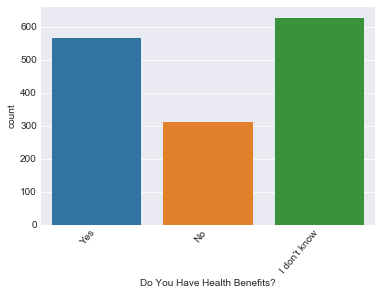

In [16]:
#Only for non-self employed, 
g=sns.countplot(x='health_benefits', data= df,orient="v", order=['Yes','No','I don\'t know'])

g.set_xlabel('Do You Have Health Benefits?')
for item in g.get_xticklabels():
    item.set_rotation(50)
    item.set_horizontalalignment('right')

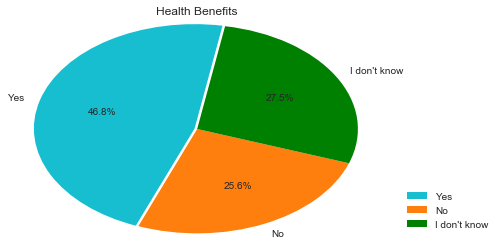

In [17]:
# defining labels
bene = ['Yes','No','I don\'t know']

notself = df[df.self_employed == 0]

# portion covered by each label
slices = [sum(notself.health_benefits == 'Yes'),sum(notself.health_benefits == 'No'),sum(notself.health_benefits == 'I don\'t know') ]
                                            
# color for each label
colors = ["#17becf", "#ff7f0e", 'g']

# plotting the pie chart
plt.pie(slices, labels = bene, colors=colors, 
        startangle=80, shadow = False, explode = (0.02, 0, 0),
        radius = 1.2, autopct = '%1.1f%%')

# plotting legend
plt.legend(loc = 'lower left',bbox_to_anchor = [1.1, 0])
plt.title('Health Benefits')


In [18]:
with_mental_health = (sum(df['current_mentdis']=='Yes') + sum(df['current_mentdis']=='Maybe'))/sum(df['self_employed']==0)
print("The percentage of employees working in tech, with a potential mental health disorder:", '{0:.0%}'.format(with_mental_health))

The percentage of employees working in tech, with a potential mental health disorder: 79%


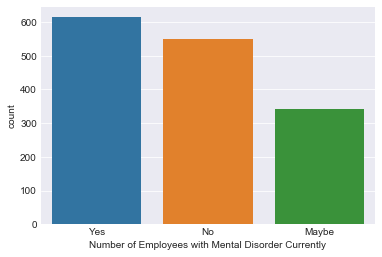

In [19]:
#Number of people in tech industry with mental health disorder
g=sns.countplot(x='current_mentdis', data=df, orient="v",order=['Yes','No','Maybe'])
g.set_xlabel('Number of Employees with Mental Disorder Currently')

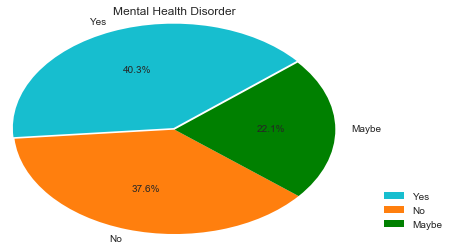

In [32]:
# defining labels
bene = ['Yes','No','Maybe']

notself = df[df.self_employed == 0]

# portion covered by each label
slices = [sum(notself.current_mentdis =='Yes'),sum(notself.current_mentdis == 'No'),sum(notself.current_mentdis == 'Maybe') ]
                                            
# color for each label
colors = ["#17becf", "#ff7f0e", 'g']

# plotting the pie chart
plt.pie(slices, labels = bene, colors=colors, 
        startangle=40, shadow = False, explode = (0.02, 0, 0),
        radius = 1.2, autopct = '%1.1f%%')

# plotting legend
plt.legend(loc = 'lower left',bbox_to_anchor = [1.1, 0])
plt.title('Mental Health Disorder')

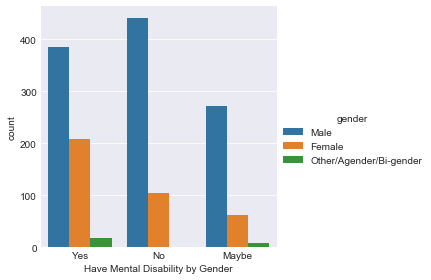

In [21]:
#Breakdown by gender
g=sns.factorplot(x='current_mentdis', hue='gender', kind="count" ,data= df,orient="v",order=['Yes','No','Maybe'])
g.set(xlabel='Have Mental Disability by Gender')

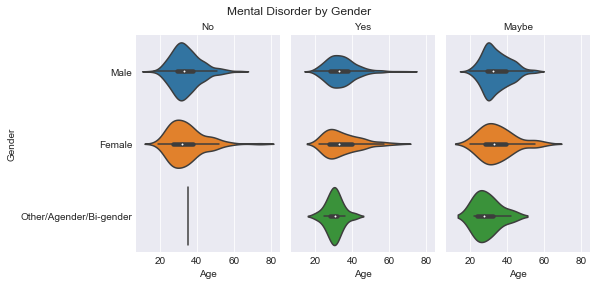

In [22]:
#Breakdown by age
g=sns.factorplot(x='age', y='gender', col='current_mentdis', data= df, orient="h", size=4, aspect=.7, 
                 kind="violin")
(g.set_axis_labels("Age", "Gender")
 .set_titles("{col_name}")) 
plt.subplots_adjust(top=.88)
g.fig.suptitle('Mental Disorder by Gender')


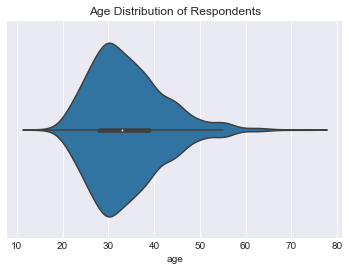

In [23]:
#overall respondent ages
g=sns.violinplot(x=df['age'])
g.set_title('Age Distribution of Respondents')


## Break down the types of conditions and find numbers of each

In [24]:
#Combine diagnosed condition and possible condition
df['conditions'] = df['what_condition'].astype(str)+df['maybe_what'].astype(str)
df['conditions'].head(5)

0                    
1       Mood Disorder
2                    
3       Mood Disorder
4    Anxiety Disorder
Name: conditions, dtype: object

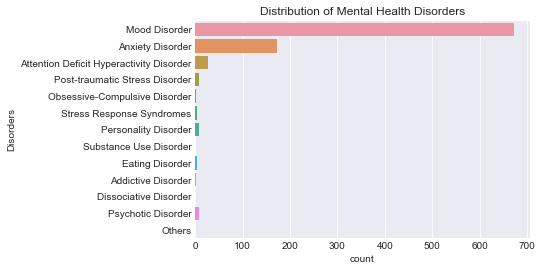

In [25]:
# print(tmp[0].value_counts())
g = sns.countplot(y=df['conditions'], order=[
    'Mood Disorder', 'Anxiety Disorder', 'Attention Deficit Hyperactivity Disorder',
    'Post-traumatic Stress Disorder', 'Obsessive-Compulsive Disorder',
    'Stress Response Syndromes', 'Personality Disorder', 'Substance Use Disorder',
    'Eating Disorder', 'Addictive Disorder', 'Dissociative Disorder', 
    'Psychotic Disorder', 'Others'])
g.set_ylabel('Disorders')
g.set_title('Distribution of Mental Health Disorders')

# What is the attitude towards mental health

### Willingness to share mental health disorder

* Percent of industry who are afraid to reveal their mental health disorder to a client because they are concerned it will negatively affect them is 29%
* Percent of industry who wouldn't reveal a mental health disorder to a client is 44%
* The breakdown of those who believe thier employer treats mental health the same as physical health is about 50/50 (not including "I don't know answers"). 

In [26]:
import collections
counts=df['reveal_clients'].value_counts()
print(counts)
no_share = (44 + 85)/sum(counts)
print()
print("The percentage of employees working in tech, who wouldn't disclose a mental health disorder:", '{0:.0%}'.format(no_share))
negative = (85)/sum(counts)
print()
print("Think revealing would impact them negatively:", '{0:.0%}'.format(negative))

Not applicable to me                         105
No, because it would impact me negatively     85
Sometimes, if it comes up                     59
No, because it doesn't matter                 44
Yes, always                                    2
Name: reveal_clients, dtype: int64

The percentage of employees working in tech, who wouldn't disclose a mental health disorder: 44%

Think revealing would impact them negatively: 29%


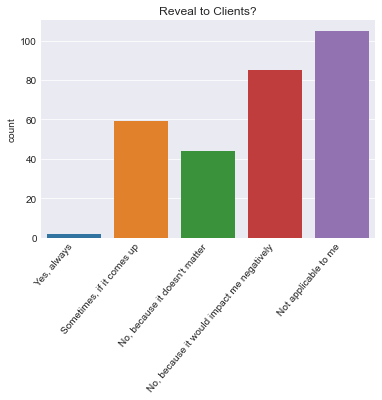

In [27]:
#Number of people in tech industry with mental health disorder
clients = sns.countplot(x='reveal_clients', data=df, orient="v",
                        order=['Yes, always','Sometimes, if it comes up','No, because it doesn\'t matter',
                               'No, because it would impact me negatively','Not applicable to me'])
clients.set_xlabel('')
clients.set_title('Reveal to Clients?')
for item in clients.get_xticklabels():
    item.set_rotation(50)
    item.set_horizontalalignment('right')
#'reveal_clients','reveal_client_impact','reveal_coworkers','reveal_cowork_impact',
   #         'product_affect','percentage_time',

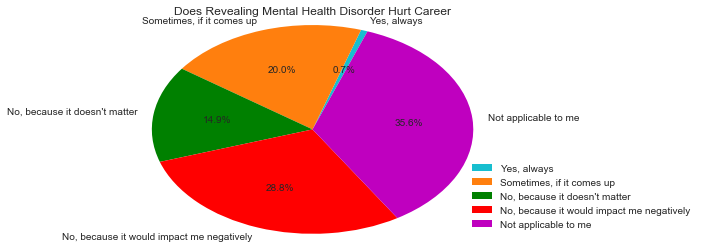

In [40]:
# defining labels
dif = ['Yes, always','Sometimes, if it comes up','No, because it doesn\'t matter',
       'No, because it would impact me negatively','Not applicable to me']

# portion covered by each label
slices = [sum(df.reveal_clients == 'Yes, always'),
          sum(df.reveal_clients == 'Sometimes, if it comes up'),
          sum(df.reveal_clients == 'No, because it doesn\'t matter'),
          sum(df.reveal_clients == 'No, because it would impact me negatively'),
          sum(df.reveal_clients == 'Not applicable to me') ]
                                            
# color for each label
colors = ["#17becf", "#ff7f0e", 'g', 'r', 'm']

# plotting the pie chart
plt.pie(slices, labels = dif, colors=colors, startangle=70, shadow = False, explode = (0, 0, 0, 0, 0), radius = 1.2, autopct = '%1.1f%%')

# plotting legend
plt.legend(loc = 'lower left',bbox_to_anchor = [.95, 0])
plt.title('Does Revealing Mental Health Disorder Hurt Career')

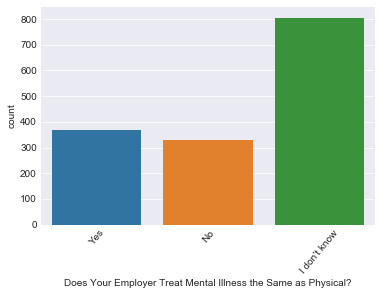

In [41]:
#Employee Treat mental health the same as physical?
clients = sns.countplot(x='mental_same_physical', data=df, orient="v", order=['Yes','No','I don\'t know'])
clients.set_xlabel('Does Your Employer Treat Mental Illness the Same as Physical?')
for item in clients.get_xticklabels():
    item.set_rotation(50)

### Breakdown of beliefs that being identified as having a mental health disorder would hurt thier career.
* Very few of the respondents beileved that if they were identified as having a mental health disorder, that would not hurt their career.
* However, of those who have revealed thier disorder to a coworker, very few identified conclusively that it had an effect on their career. Most were not sure if it had any efffect.

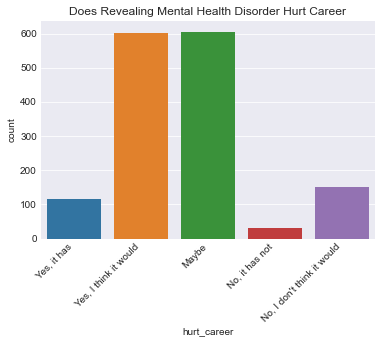

In [42]:
#Numbers of respondents who say that being identified as having a mental health disorder 
#would negatively affect their career.
hurt = sns.countplot(x='hurt_career', data=df, orient="v", 
                     order = ['Yes, it has','Yes, I think it would', 'Maybe', 'No, it has not', 
                              'No, I don\'t think it would'])
hurt.set_title('Does Revealing Mental Health Disorder Hurt Career')
for item in hurt.get_xticklabels():
    item.set_rotation(45)
    item.set_horizontalalignment('right')

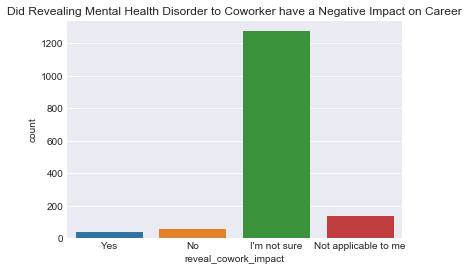

In [56]:
#Numbers who think revealing thier mental health dis. to a coworker had a neg. impact on career.
ax1=sns.countplot(x='reveal_cowork_impact', data=df, orient = "v", order=['Yes', 'No', 'I\'m not sure', 'Not applicable to me'])
ax1.set_title('Did Revealing Mental Health Disorder to Coworker have a Negative Impact on Career')

In [44]:
df['reveal_cowork_impact'].value_counts()

I'm not sure            1273
Not applicable to me     137
No                        57
Yes                       37
Name: reveal_cowork_impact, dtype: int64

### Breakdown by gender, the belief that sharing your mental illness will negatively affect your career.

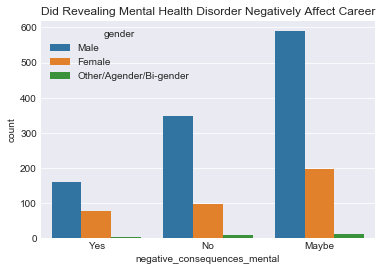

In [57]:
hurt=sns.countplot(x='negative_consequences_mental', hue='gender', data= df, orient="v", order=['Yes', 'No', 'Maybe'])    
hurt.set_title('Did Revealing Mental Health Disorder Negatively Affect Career')

## How is the workplace addressing the problems?
* Many people are not being provided health benefits

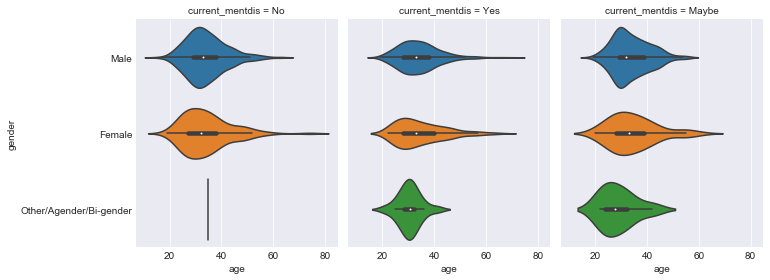

In [46]:
#Breakdown by gender
bene=sns.factorplot(x='age', y='gender', col='current_mentdis',
               data= df, orient="h", size=4, aspect=.9, kind="violin")


## What kinds of help do workplaces offer to employees with mental health disease?

In [47]:
#I've found nothing
#information not available

## What challenges have employees found with their disease and their workplace/company?
* We can see by the differences in responses that there is a big difference for those with mental health disorders whether they are treated or not. Nearly 600 people responded that their disorder affects them "often" if they go untreated. Compared to that of the treated, where the largest responses were "rarely" or "sometimes". 
* Approximately one thired of self employed respondents are not aware of resources to help them with a mental disorder.

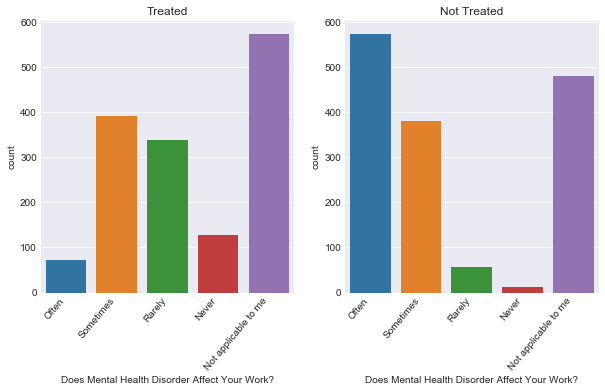

In [48]:
# this question only applies to non self-employed
a4_dims = (10,5)
fig, ax = plt.subplots(1,2,figsize=a4_dims)
e=sns.countplot(x='interfere_while_treated', data= df,orient="v",ax=ax[0], 
                order=['Often','Sometimes','Rarely','Never','Not applicable to me'])
e.set(xlabel='Does Mental Health Disorder Affect Your Work?')
e.set_title('Treated')
for item in e.get_xticklabels():
    item.set_rotation(50)
    item.set_horizontalalignment('right')
g=sns.countplot(x='interfere_not_treated', data= df,orient="v",ax=ax[1], 
               order=['Often','Sometimes','Rarely','Never','Not applicable to me'])
g.set(xlabel='Does Mental Health Disorder Affect Your Work?')
g.set_title('Not Treated')
for item in g.get_xticklabels():
    item.set_rotation(50)
    item.set_horizontalalignment('right')

## Do you know local or online resources to seek help for a mental health disorder

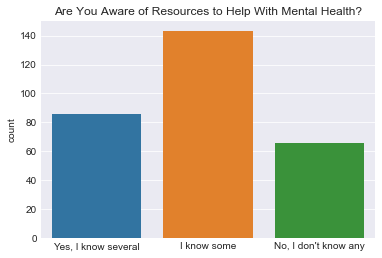

In [49]:
#Numbers aware of resources to help with mental health disorders
g=sns.countplot(x='aware_resources', data= df, orient="v")
g.set(xlabel='')
g.set_title('Are You Aware of Resources to Help With Mental Health?')

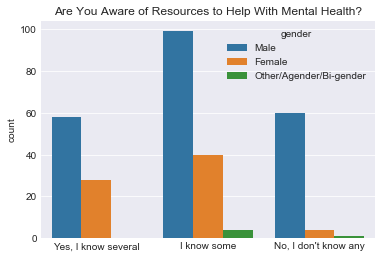

In [50]:
g=sns.countplot(x='aware_resources', hue='gender', data= df, orient="v")
g.set(xlabel='')
g.set_title('Are You Aware of Resources to Help With Mental Health?')

Observations:
Quite a few people are aware of some resources for mental help
Significant number of people do not know any resources for help. This should be addressed
Compared to men a lot of females do not have information about mental help. This should be looked into

## Do people beleive that mental health affects  productivity

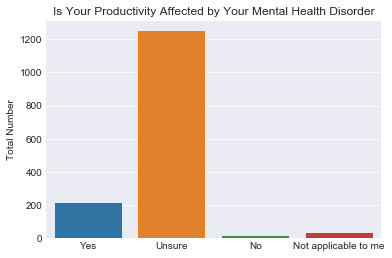

In [51]:
g=sns.countplot(x='product_affect', data= df, orient="v", order=['Yes','Unsure','No',
                                                                 'Not applicable to me']) 
g.set(xlabel='',ylabel='Total Number')
g.set_title('Is Your Productivity Affected by Your Mental Health Disorder')

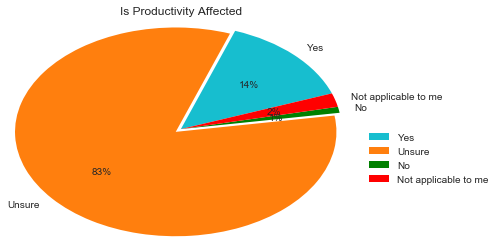

In [59]:
# defining labels
cats = ['Yes', 'Unsure', 'No', 'Not applicable to me']

# portion covered by each label
slices = [sum(df.product_affect == 'Yes'),sum(df.product_affect == 'Unsure'),
          sum(df.product_affect == 'No'),sum(df.product_affect == 'Not applicable to me') ]

# color for each label
colors = ["#17becf", "#ff7f0e", 'g', 'r']

# plotting the pie chart
plt.pie(slices, labels = cats, colors=colors, 
        startangle=20, shadow = False, explode = (0, 0.05, 0, 0),
        radius = 1.2, autopct = '%1.f%%')

# plotting legend
plt.legend(bbox_to_anchor=(1.05, .5), loc=2, borderaxespad=0.)
plt.title("Is Productivity Affected")

Observation: 83% of respondents don't know if their mental health problem affects their productivity. If people don't realize this than they will not be serious about assessing mental health.

## Those who think that it affects productivity we check how much of work time is afffected

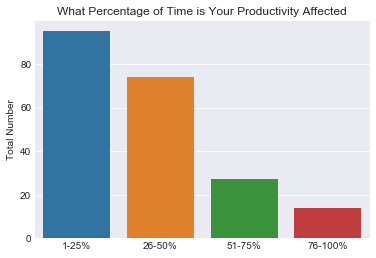

In [53]:
g=sns.countplot(x='percentage_time', data= df, orient="v") 
plt.xticks([0, 1, 2, 3], ['1-25%', '26-50%', '51-75%', '76-100%'])
g.set(xlabel='',ylabel='Total Number')
g.set_title('What Percentage of Time is Your Productivity Affected')

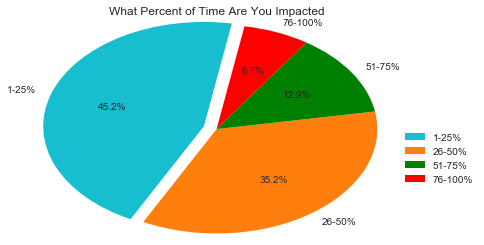

In [60]:
# defining labels
activities = ['1-25%', '26-50%', '51-75%', '76-100%']

# portion covered by each label
slices = [sum(df.percentage_time == 1),sum(df.percentage_time == 2),
          sum(df.percentage_time == 3),sum(df.percentage_time == 4) ]

# color for each label
colors = ["#17becf", "#ff7f0e", 'g', 'r']

# plotting the pie chart
plt.pie(slices, labels = activities, colors=colors, 
        startangle=80, shadow = False, explode = (0.1, 0, 0, 0),
        radius = 1.2, autopct = '%1.1f%%')

# plotting legend
plt.legend(bbox_to_anchor=(1.05, .5), loc=2, borderaxespad=0.)
plt.title("What Percent of Time Are You Impacted")

Observation - of those who think their productivity is hampered by mental disease:
    
* 45% think that it affects 1-25% of their working time.
* 35.2% think that it affects 26-50% of their working time.
* 12.9% think that it affects 51-75% of their working time.
* 6.7% think that it affects 76-100% of their working time.

## Was anonymity protected if employee disclosed mental problem

[<matplotlib.text.Text at 0x12061c630>, <matplotlib.text.Text at 0x11dc1fd68>]

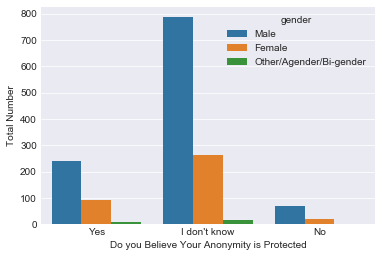

In [55]:
g=sns.countplot(x='anonymity_protected',hue="gender", data= df, orient="v", order=['Yes','I don\'t know','No'] ) 
g.set(xlabel='Do you Believe Your Anonymity is Protected',ylabel='Total Number')

Observation:
    
One of the reasons employees don't disclose there mental problems is due to lack of anonymity. This survey suggests that over 50% people are not sure if their anonymity will be protected. This instills fear in employees. This should be addressed by having proper guidelines issues orgonization wide. This observation is similar across gender.